# Pokémon showdown
## Domain understanding
Pokémon is the highest-grossing media franchise worldwide of all time. The games even have a pretty big online competitive player vs player battle simulator. This simulator is called Pokémon showdown. It is a website where you can play Pokémon games online against other players. I have been a long time fan of the Pokémon series and after playing their most recent game title I wanted to learn how to play competitive Pokémon. When I wanted to play the official format I hit a big wall, team building. Constructing a good team is the base to win a game of competitive Pokémon in Pokémon showdown, there are a lot of things to keep count of when constructing a team such as; type matchups, strategies, items your Pokémon are holding and stat parameters that effect the power of your Pokémon. This was a big hurdle for me to start playing Pokémon showdown. When I needed a challenge for this school project I instantly thought of the struggle I faced when wanting to play Pokémon showdown. I wondered what Pokémon are the most popular and what Pokémon are the most used. I have also wondered what the most popular Pokémon are in different generations. Every few years a new generation of Pokémon comes out and there are around 100 to 200 new Pokémon added that are usable in competitive Pokémon. I want to find out if there is a way to predict which Pokémon will be used a lot for future generations.



## Data source

The data I am using is a usage file from Smogon. Smogon is a website that provides a lot of information about the Pokémon games. They have a lot of data about the games and the competitive scene. They also have a website where you can play Pokémon games online against other players. This is where the data I am using for the usage stats comes from. I wanted to combine the usage stats from Smogon with another dataset that contains all Pokémon and their various forms. This dataset is from Kaggle and is called ['Complete Pokémon Dataset (Gen I-VI)'](https://www.kaggle.com/datasets/brdata/complete-pokemon-dataset-gen-iiv). This dataset contains all Pokémon and their various forms.

## Data provisioning
To start off I needed a way to read out the data files that contain usage stats provided by Smogon*. As a base I used a script made by Kaggle user named 'Fruity Fritz'. I needed to reform a bit of their code to fit my own wants and needs.

*Smogon is a website that provides a lot of information about the Pokémon games. They have a lot of data about the games and the competitive scene. They also have a website where you can play Pokémon games online against other players. This is where the data I am using comes from.

In [2]:
import numpy as np
import pandas as pd
import urllib.request as urllib, os
import ssl

Later in this notebook I got a SettingWithCopyWarning. This was not relevant because it occurred in a copy of a dataframe so changing the values should not be an issue, the warning can not differentiate between the original dataframe or a copy of it. Read more about this issue [here](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas).

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
# made function to format the same sort of file later
def import_showdown_usage_stats(url, filename): # file url and name for local storage
    # location for datafile
    datafolder = 'data/'
    #download file from url to local storage
    gcontext = ssl.SSLContext() # needed to avoid possible certificate validation error
    downloaded = urllib.urlopen(url, context=gcontext)
    buf = downloaded.read()

    try:
        os.mkdir(datafolder)
    except FileExistsError:
        pass

    with open(datafolder + filename, 'wb') as f:
        f.write(buf)
    # import dataframe
    df = pd.read_csv(datafolder + filename, sep="|",skiprows=5,names=["rank","pokemon","usage","count",],usecols=[1,2,3,4])
    # drop any NaNs we find
    df.dropna(inplace=True)
    # changing data type of the columns
    for k, v in {"rank":int,"pokemon":str, "usage":str, "count":int}.items():
        df[k] = df[k].astype(v)
    # fixing leading/trailing white spaces
    df["pokemon"] = df["pokemon"].str.strip()
    df["usage"] = df["usage"].str.strip()
    # fixing format of string to not use '%'
    df["usage"] = df["usage"].str.rstrip('%')
    # change datatype of usage_%
    df["usage"] = df["usage"].astype(float) / 100
    # get rid of unnecessary columns
    df = df[['pokemon' ,'count' ,'usage']]
    return df

Now we need to use the method above to import and format a usage file from Smogon.

In [5]:
# import usage stats from Smogon
usage_stats = import_showdown_usage_stats(url = "https://www.smogon.com/stats/2023-01/gen9vgc2023series2-0.txt", filename="gen9s2vgc0.txt")

# check if the file is imported correctly
print(usage_stats.shape) # describes the amount of records and columns
display(usage_stats.dtypes) # describes the data types of the columns
usage_stats # shows the records

(393, 3)


pokemon     object
count        int32
usage      float64
dtype: object

,pokemon,count,usage
0,Flutter Mane,795029,2.804525e-01
1,Iron Hands,724440,2.555517e-01
2,Amoonguss,705360,2.488211e-01
3,Iron Bundle,663073,2.339040e-01
4,Gholdengo,635767,2.242716e-01
...,...,...,...
388,Smoliv,1,4.000000e-07
389,Bounsweet,1,4.000000e-07
390,Staravia,1,4.000000e-07
391,Nacli,1,4.000000e-07


I imported the dataset containing all Pokémon as a csv file and found out the encoding was not the standard UTF-8 encoding, so I just needed to specify the encoding in the read function.

In [6]:
# importing dataset containing all Pokémon
names = ["dexnum","name","type1","type2","total","hp","atk","def","sp.atk","sp.def","spd","variant"] # names of the columns
stats = pd.read_csv("./data/Pokedex_Cleaned.csv",names=names,encoding='windows-1252') # read csv file, specified encoding

print(stats.shape)
display(stats.dtypes)
stats.head(10)

(1173, 12)


dexnum      int64
name       object
type1      object
type2      object
total       int64
hp          int64
atk         int64
def         int64
sp.atk      int64
sp.def      int64
spd         int64
variant    object
dtype: object

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,NaN
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,NaN
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,NaN
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,NaN
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,NaN
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,NaN
6,6,Charizard,Fire,Dragon,634,78,130,111,130,85,100,Mega X
7,6,Charizard,Fire,Flying,634,78,104,78,159,115,100,Mega Y
8,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,NaN
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,NaN


## Data cleaning

There were a lot of NaN values which I needed to fill in a way so that the data is 'complete' and ready to be merged with the usage dataset from Smogon.

In [7]:
stats.type2 = stats.type2.fillna('none') # if the second typing is NaN it means there is no second typing hence the value of none
stats.variant = stats.variant.fillna('') # if the variant is NaN it means there is no variant. replaced with empty string to add variant at the end of the name as done in the usage df
stats.head(10) # check if the NaN values are filled

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,
5,5,Charmeleon,Fire,none,405,58,64,58,80,65,80,
6,6,Charizard,Fire,Dragon,634,78,130,111,130,85,100,Mega X
7,6,Charizard,Fire,Flying,634,78,104,78,159,115,100,Mega Y
8,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,
9,7,Squirtle,Water,none,314,44,48,65,50,64,43,


After seeing the datafile above I wanted to check the values of both the type columns.

First I wanted to check the type2 column, so I can see if the previous action to fill the NaN values actually worked.

In [10]:
stats.type2.value_counts() # shows the amount of records for each value in the column

none        540
Flying      118
Psychic      47
Poison       46
Fairy        42
Fighting     42
Ground       41
Steel        38
Dragon       35
Ghost        34
Grass        34
Dark         33
Water        22
Ice          22
Fire         19
Rock         19
Normal       19
Electric     13
Bug           9
Name: type2, dtype: int64

These values are what I expected and also what I want from this column

When inspecting the datafile in another software tool, I found that there were some wierd values in type1 and  wanted to check them out.

In [11]:
stats.type1.value_counts() # shows the amount of records for each value in the column

Water       147
Normal      130
Grass       102
Bug          99
Psychic      76
Electric     73
Fire         73
Rock         67
Dark         56
Dragon       47
Ground       47
Poison       46
Fighting     46
Ghost        46
Steel        42
Fairy        32
Ice          27
Flying       12
Null          2
Male          1
Female        1
Rockruff      1
Name: type1, dtype: int64

After seeing the wierd values of Rockruff, null, male and female in typings I further looked into them.

In [12]:
stats.loc[(stats['type1'] == "Rockruff") | (stats['type1'] == "Male") | (stats['type1'] == "Female") | (stats['type1'] == "Null")] # shows the records with the faulty values

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
801,678,Meowstic,Male,Psychic,466,74,48,76,83,81,104,
802,678,Meowstic,Female,Psychic,466,74,48,76,83,81,104,
884,744,Rockruff,Rockruff,Rock,280,45,65,40,30,40,60,Own Tempo
916,772,Type:,Null,Normal,534,95,95,95,95,95,59,
917,772,Type:,Null,none,534,95,95,95,95,95,59,


The null value is from a Pokémon named "type:null", both records are for this same Pokémon. The stats are exactly the same, so I will delete the second mention and just replace the faulty record with a correct one.

The values for male and female are faulty in the sense that they occupy the wrong column, they need to be in variant but are in type1. The Rockruff record is also faulty. the Variant value contains their 'ability' which is another attribute that we do not need in this dataset. I have no idea why it is here.

Because there are only 5 faulty records, I am going to manually replace them.

In [13]:
# fixing faulty records
stats.loc[801] = ['678','Meowstic','Psychic','none','466','74','48','76','83','71','104','Male']
stats.loc[802] = ['678','Meowstic','Psychic','none','466','74','48','76','83','71','104','Female']
stats.loc[884] = ['744','Rockruff','Rock','none','280','45','65','40','30','40','60','']
stats.loc[916] = ['772','Type:Null','Normal','none','534','95','95','95','95','95','59','']

# deleting double faulty records
stats.drop(stats.index[917], inplace=True)

# checking if the faulty records are fixed
stats.type1.value_counts()

Water       147
Normal      131
Grass       102
Bug          99
Psychic      78
Fire         73
Electric     73
Rock         68
Dark         56
Ground       47
Dragon       47
Fighting     46
Poison       46
Ghost        46
Steel        42
Fairy        32
Ice          27
Flying       12
Name: type1, dtype: int64

Later in the process of cleaning the data I found another faulty record. These were the records for the Pokémon named Nidoran. In the games this Pokémon has multiple variants and their gender is displayed next to their name to indicate which variant it is.

In [14]:
stats.loc[(stats['name'] == "Nidoran?")] # shows the records with the faulty value

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
40,29,Nidoran?,Poison,none,275,55,47,52,40,40,41,
43,32,Nidoran?,Poison,none,273,46,57,40,40,40,50,


In [15]:
# fixing faulty records
stats.loc[40] = ['29','Nidoran','Poison','none','275','55','47','52','40','40','41','Female']
stats.loc[43] = ['32','Nidoran','Poison','none','273','46','57','40','40','40','50','Male']

# checking if the faulty records are fixed
stats.loc[(stats['name'] == "Nidoran")]

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
40,29,Nidoran,Poison,none,275,55,47,52,40,40,41,Female
43,32,Nidoran,Poison,none,273,46,57,40,40,40,50,Male


Further, in my data cleaning process I found more faulty records. Some records have Ice suffixed to their name when it is meant to be in the Type1 column values and the Type1 column is supposed to be the type2 column values.

In [16]:
stats[stats['name'].str.contains("Ice")==True] # checks for faulty records containing Ice in their name

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
184,144,ArticunoIce,Flying,none,580,90,85,100,95,125,85,
272,220,SwinubIce,Ground,none,250,50,50,40,30,30,50,
273,221,PiloswineIce,Ground,none,450,100,100,80,60,60,50,
278,225,DelibirdIce,Flying,none,330,45,55,45,65,45,75,
292,238,SmoochumIce,Psychic,none,305,45,30,15,85,65,65,
455,378,RegiceIce,Ice,none,580,80,50,100,100,200,50,
568,473,MamoswineIce,Ground,none,530,110,130,80,70,60,80,
574,478,FroslassIce,Ghost,none,480,70,80,70,80,70,110,
1022,872,SnomIce,Bug,none,185,30,25,35,45,30,20,
1023,873,FrosmothIce,Bug,none,475,70,65,60,125,90,65,


In [17]:
stats.loc[(stats['name'].str.contains("Ice")==True), 'type2'] = stats['type1'] # copies the type1 value to type2
stats.loc[(stats['name'].str.contains("Ice")==True), 'type1'] = 'Ice' # changes type1 value to Ice
stats.loc[(stats['name'].str.contains("Ice")==True), 'name'] = stats['name'].str.replace('Ice','') # removes Ice from the name
stats.loc[(stats['name'].str.contains("Regice")==True)]

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
455,378,Regice,Ice,Ice,580,80,50,100,100,200,50,


After inspecting the datasets I found out that there were some records with the same type in both columns. I am going to change the type2 value to none if the type1 and type2 values are the same.

In [18]:
stats.loc[(stats['type1'] == stats['type2'])] # checks if there are any records with the same type in both columns

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
46,35,Clefairy,Fairy,Fairy,323,70,45,48,60,65,35,
455,378,Regice,Ice,Ice,580,80,50,100,100,200,50,
787,664,Scatter,Bug,Bug,200,38,35,40,27,25,35,
973,824,Blip,Bug,Bug,180,25,20,20,25,45,45,


In [19]:
stats.loc[(stats['type1'] == stats['type2']), 'type2'] = 'none' # changes the type2 value to none if the type1 and type2 values are the same
stats.loc[(stats['type1'] == stats['type2'])] # checks if the records are fixed

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant


After merging datasets I found some faulty names, there was really no correlation between these faulty records, so I am just going to replace fix up these records.

In [20]:
stats['name'] = stats['name'].replace('Flabébé','Flabebe') #had issues merging the records because of the e's

# the pokemon names Scatterbug and Blipbug had their name sliced between the name and type1 column. its type is indeed bug so I just renamed it and removed the second typing
stats.loc[(stats['name'].str.contains("Scatter")==True), 'name'] = stats['name'].str.replace('Scatter','Scatterbug')
stats.loc[(stats['name'].str.contains("Blip")==True), 'name'] = stats['name'].str.replace('Blip','Blipbug')

As you can see, the weird values are now no longer present in the dataset.

Now we are going to change the notation of the Variant to those that are used by our usage stats dataframe. These notations are the ones that Smogon uses.
When I found this dataset I knew it would take a lot of work to get all the data cleaned. I still chose this one because it was the most complete I could find. Even tough this dataset takes a lot of work to prepare, it only needs data cleaning, other datasets would need to be merged together to create this one and I prefer to clean just one dataset apposed to multiple.

In [21]:
stats.variant.value_counts() # shows the amount of records for each value in the column

                    979
Mega                 42
Galarian             16
Alolan               15
Hisuian              13
                   ... 
Confined              1
Unbound               1
Baile Style           1
Pa u Style            1
Two-Segment Form      1
Name: variant, Length: 88, dtype: int64

After this I needed to clean the remaining variants. To start with I changed the notation of the regions to the one that Smogon uses.

In [22]:
# preparing the variant column
stats['variant'] = stats['variant'].str.strip()

# notation for region specific variants
stats['variant'] = stats['variant'].replace(['Galarian'],'Galar')
stats['variant'] = stats['variant'].replace(['Alolan'],'Alola')
stats['variant'] = stats['variant'].replace(['Hisuian'],'Hisui')
stats['variant'] = stats['variant'].replace(['Paldean'],'Paldea')

Then I changed the gender notations.

In [23]:
# gender notation
stats['variant'] = stats['variant'].replace(['Female'],'F')
stats['variant'] = stats['variant'].replace(['Male'],'')

Then I removed the suffixes(?).

In [24]:
# removed unneeded endings
stats['variant'] = stats['variant'].str.replace(' Form','')
stats['variant'] = stats['variant'].str.replace(' Style','')
stats['variant'] = stats['variant'].str.replace(' Super','')
stats['variant'] = stats['variant'].str.replace(' Size','')
stats['variant'] = stats['variant'].str.replace(' Plumage','')

At first, I removed some variants that did not matter in stats or were not available in Pokémon showdown. But then I found some rows missing later in the data cleaning process. This means it has been dropped from the dataframe somehow. So I stopped deleting variants. Even if they are unnecessary, they just won't be merged with the usage dataframe.

```python
# variants that are available in showdown but are a game mechanic which means they are not available to choose for your team
stats = stats[stats.variant != 'Mega']
stats = stats[stats.variant != 'Mega X']
stats = stats[stats.variant != 'Mega Y']

# variants that dont matter in stats or are not available in Pokemon showdown
stats = stats[stats.variant != 'White-Striped']
stats = stats[stats.variant != 'Red-Striped']
stats = stats[stats.variant != 'Partner']
stats = stats[stats.variant != 'Altered']
stats = stats[stats.variant != 'Eternamax']
```

There were still some Pokémon with multiple variants that did not have a base variant or empty variant. Those still needed fixing.

In [25]:
# base forms that have a variant fixes
stats['variant'] = stats['variant'].replace('Red-Striped','')
stats['variant'] = stats['variant'].replace('Hero of Many Battles','')
stats['variant'] = stats['variant'].replace('Incarnate','')
stats['variant'] = stats['variant'].replace('Ordinary','')
stats['variant'] = stats['variant'].replace('Aria','')
stats['variant'] = stats['variant'].replace('Shield','')
stats['variant'] = stats['variant'].replace('Average','')
stats['variant'] = stats['variant'].replace('50%','')
stats['variant'] = stats['variant'].replace('Confined','')
stats['variant'] = stats['variant'].replace('Baile','')
stats['variant'] = stats['variant'].replace('Midday','')
stats['variant'] = stats['variant'].replace('Solo','')
stats['variant'] = stats['variant'].replace('Core','')
stats['variant'] = stats['variant'].replace('Single Strike','')
stats['variant'] = stats['variant'].replace('Full Belly Mode','')
stats['variant'] = stats['variant'].replace('Family of Three','')
stats['variant'] = stats['variant'].replace('Family of Four','')
stats['variant'] = stats['variant'].replace('Amped','')
stats['variant'] = stats['variant'].replace('Two-Segment','')
stats['variant'] = stats['variant'].replace('Green','')
stats['variant'] = stats['variant'].replace('Zero','')

Now I needed to manually fix the variants that still needed fixes.

In [26]:
# unique variant notation fixes
stats['variant'] = stats['variant'].replace('Crowned Sword','Crowned')
stats['variant'] = stats['variant'].replace('Crowned Shield','Crowned')
stats['variant'] = stats['variant'].replace('Ice Rider','Ice')
stats['variant'] = stats['variant'].replace('Shadow Rider','Shadow')
stats['variant'] = stats['variant'].replace('Galarian Zen','Galar-Zen')
stats['variant'] = stats['variant'].replace('Pa u',"Pa'u")
stats['variant'] = stats['variant'].replace('Rapid Strike','Rapid-Strike')
stats['variant'] = stats['variant'].replace('Hangry Mode','Hangry')
stats['variant'] = stats['variant'].replace('Low Key','Low-Key')
stats['variant'] = stats['variant'].replace('Galarian Standard','Galar')

# Checking if all variants are fixed
stats.variant.value_counts()

                 1009
Mega               42
Galar              17
Alola              15
Hisui              13
                 ... 
Pirouette           1
Ash                 1
Blade               1
10%                 1
Three-Segment       1
Name: variant, Length: 61, dtype: int64

After this there were still 6 variants that were not yet fully clean. These were the Pokémon: Burmy and Wormadam. These two Pokémon have the same shared 3 Variants, but those variants only matter for Wormadam and not for Burmy. This means I will need to manually these values. the Variants in question are the Plant Cloak, Sandy Cloak and Trash Cloak variants. The Plant cloak is the easiest to handle because this is the 'default' form according to the [Smogon Pokédex](https://www.smogon.com/dex/sv/pokemon/), this means that an empty('') value would be fitting for both Pokémon. The naming of cloak in the variant needs to be removed for the same reason.
 The only thing left to do was to remove the remaining Burmy, the way I found easiest was to locate them and manually remove the unneeded records.

```python
stats['variant'] = stats['variant'].replace('Plant Cloak','')
stats['variant'] = stats['variant'].str.replace(' Cloak','')
stats.loc[(stats['name'] == "Burmy") | (stats['name'] == "Wormadam")]
```

```python
stats.drop(stats.index[494], inplace=True)
stats.drop(stats.index[495], inplace=True)
stats.loc[(stats['name'] == "Burmy") | (stats['name'] == "Wormadam")]
```

This did not work and I started thinking again, I asked myself if I really did need to transform this data. I didn't really need to strip out the Burmy forms. This because I want to join this dataset on the one provided by Smogon. This would mean it will only select the one with the correct variant index. In this case that index wil always by none because Smogon does not recognize the other Burmy variants. This makes the step above unnecessary.

I also found out that the dataset is incomplete. I will add the missing Pokémon manually here, this section will be updated if I find more missing Pokémon later.

In [27]:
# found some missing Pokemon and/or their variants after checking merged dataframes
stats.loc[len(stats)] = [128,"Tauros","Fighting","Water", 490, 75, 110, 105, 30, 70, 100,"Paldea-Aqua"]
stats.loc[len(stats) + 1] = [128,"Tauros","Fighting","Fire", 490, 75, 110, 105, 30, 70, 100,"Paldea-Blaze"]
stats.loc[len(stats) + 2] = [128,"Tauros","Fighting","none", 490, 75, 110, 105, 30, 70, 100,"Paldea-Combat"]
stats.loc[len(stats) + 3] = [875,"Eiscue","Ice","none", 470, 75, 80, 110, 65, 90, 50,""]
stats.loc[len(stats) + 4] = [875,"Eiscue","Ice","none", 470, 75, 80, 70, 65, 50, 130,"Noice"]
stats.loc[len(stats) + 5] = [999,"Gimmighoul","Ghost","none", 300, 45, 30, 70, 75, 70, 10,""]

# checking if the missing pokemon are added
stats.loc[(stats['dexnum'] == 128) | (stats['dexnum'] == 875) | (stats['dexnum'] == 999)]

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant
164,128,Tauros,Normal,none,490,75,100,95,40,70,110,
1172,128,Tauros,Fighting,Water,490,75,110,105,30,70,100,Paldea-Aqua
1173,128,Tauros,Fighting,Fire,490,75,110,105,30,70,100,Paldea-Blaze
1175,128,Tauros,Fighting,none,490,75,110,105,30,70,100,Paldea-Combat
1177,875,Eiscue,Ice,none,470,75,80,110,65,90,50,
1179,875,Eiscue,Ice,none,470,75,80,70,65,50,130,Noice
1181,999,Gimmighoul,Ghost,none,300,45,30,70,75,70,10,


Now I want to add a column containing the generation of the Pokémon game that the Pokémon was first introduced, this is because I think it would have significance to figure out reasons why certain Pokémon are used the most.

I had this working with a for loop and some if statements. This worked but after some feedback I got from a teacher, I found out there is a better method to do these kinds of operations. This method is called vectorization, it allows code to run on multiple threads and in the background. This means it is way faster to compute. This is not really important for this dataset but is a very important thing to keep in mind with bigger datasets.

This is the first iteration to try and classify the generation of Pokémon.

```python
stats['dexnum'] = stats['dexnum'].astype(int)

gen = []
for index, row in stats.iterrows():
    if row['dexnum'] <= 151:
        gen.append(1)
    elif row['dexnum'] > 151 and row['dexnum'] <= 251:
        gen.append(2)
    elif row['dexnum'] > 251 and row['dexnum'] <= 386:
        gen.append(3)
    elif row['dexnum'] > 386 and row['dexnum'] <= 493:
        gen.append(4)
    elif row['dexnum'] > 493 and row['dexnum'] <= 649:
        gen.append(5)
    elif row['dexnum'] > 649 and row['dexnum'] <= 721:
        gen.append(6)
    elif row['dexnum'] > 721 and row['dexnum'] <= 809:
        gen.append(7)
    elif row['dexnum'] > 809 and row['dexnum'] <= 905:
        gen.append(8)
    elif row['dexnum'] > 905:
        gen.append(9)

stats['generation'] = gen
stats
```

This was my first try at applying vectorization without fully understanding what it was completely
```python
stats['dexnum'] = stats['dexnum'].astype(int)

def get_gen(record):

    if record.dexnum <= 151:
        return 1
    elif record.dexnum > 151 and record.dexnum <= 251:
        return 2
    elif record.dexnum > 251 and record.dexnum <= 386:
        return 3
    elif record.dexnum > 386 and record.dexnum <= 493:
        return 4
    elif record.dexnum > 493 and record.dexnum <= 649:
        return 5
    elif record.dexnum > 649 and record.dexnum <= 721:
        return 6
    elif record.dexnum > 721 and record.dexnum <= 809:
        return 7
    elif record.dexnum > 809 and record.dexnum <= 905:
        return 8
    elif record.dexnum > 905:
        return 9

stats['generation'] = stats['dexnum'].map(lambda generation: get_gen())
```
After not getting this part of code to work after trying most of the methods I could find online, I requested help from one of my teachers. The reason I couldn't get it to work was mostly a syntax problem. I didn't put brackets around the part that compares the 'dexnum' column to the numbers. I also used 'and' instead of '&'

In [28]:
stats['dexnum'] = stats['dexnum'].astype(int) # make sure the dexnum column is an integer
stats['generation'] = 0 # create a new column with 0 as default value, also makes sure the column is an integer

# use the loc function to compare the dexnum column to the numbers and assign the correct generation to the generation column
stats.loc[(stats['dexnum'] <= 151), 'generation'] = 1
stats.loc[(stats['dexnum'] > 151) & (stats['dexnum'] <= 251), 'generation'] = 2
stats.loc[(stats['dexnum'] > 251) & (stats['dexnum'] <= 386), 'generation'] = 3
stats.loc[(stats['dexnum'] > 386) & (stats['dexnum'] <= 493), 'generation'] = 4
stats.loc[(stats['dexnum'] > 493) & (stats['dexnum'] <= 649), 'generation'] = 5
stats.loc[(stats['dexnum'] > 649) & (stats['dexnum'] <= 721), 'generation'] = 6
stats.loc[(stats['dexnum'] > 721) & (stats['dexnum'] <= 809), 'generation'] = 7
stats.loc[(stats['dexnum'] > 809) & (stats['dexnum'] <= 905), 'generation'] = 8
stats.loc[(stats['dexnum'] > 905), 'generation'] = 9

# checking if the generation column is added correctly
stats

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant,generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,,1
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,,1
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,128,Tauros,Fighting,Fire,490,75,110,105,30,70,100,Paldea-Blaze,1
1175,128,Tauros,Fighting,none,490,75,110,105,30,70,100,Paldea-Combat,1
1177,875,Eiscue,Ice,none,470,75,80,110,65,90,50,,8
1179,875,Eiscue,Ice,none,470,75,80,70,65,50,130,Noice,8


After inspecting the data for generation I found out that the column was successfully added with the correct data.

I think it is now time to combine the Pokémon and variant column to ready this dataframe for a merge. For this part I got the same feedback to apply vectorization.

```python
pokemon_names = []

for index, row in stats.iterrows():
    if len(row.variant) >= 1:
        pokemon_names.append(row['name'] + "-" + row['variant'])
    else:
        pokemon_names.append(row['name'])

stats['pokemon'] = pokemon_names
stats
```

```python
variant = stats['variant'].to_numpy()
name = stats['name'].to_numpy()

length = np.array([len(i) for i in variant])

stats['pokemon'] = 0

stats.loc[(len(['variant'].str) >= 1), 'pokemon'] = stats['name'] + "-" + stats['variant']
stats.loc[(len(['variant'].str) < 1), 'pokemon'] = stats['name']

stats
```

```python
stats['pokemon'] = stats['variant'].apply(lambda x: stats['name'].str if len(x) >= 1 else (stats['name'].str + "-" + stats['variant'].str))
```

In [29]:
# create a new column with the name and variant of the pokemon according to smogon name conventions
stats.loc[(stats['variant'].str.len() >= 1), 'pokemon'] = stats['name'] + "-" + stats['variant']
stats.loc[(stats['variant'].str.len() < 1), 'pokemon'] = stats['name']

# remove all spaces from the pokemon column
stats['pokemon'] = stats['pokemon'].str.strip()

# checking if the pokemon column is added correctly
stats

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant,generation,pokemon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,,1,Bulbasaur
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,,1,Ivysaur
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,,1,Venusaur
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,,1,Venusaur
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,,1,Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,128,Tauros,Fighting,Fire,490,75,110,105,30,70,100,Paldea-Blaze,1,Tauros-Paldea-Blaze
1175,128,Tauros,Fighting,none,490,75,110,105,30,70,100,Paldea-Combat,1,Tauros-Paldea-Combat
1177,875,Eiscue,Ice,none,470,75,80,110,65,90,50,,8,Eiscue
1179,875,Eiscue,Ice,none,470,75,80,70,65,50,130,Noice,8,Eiscue-Noice


After inspecting the data for the new column I found out that the column was successfully added with the correct data.

Now I want to add is whether the Pokémon has only one type or multiple to the dataset. This is so that I can compare the usage of single type and dual type Pokémon.

In [30]:
stats['monotype'] = 0 # create a new column with 0 as default value, also makes sure the column is an integer

# use the loc function to compare the type2 column to the string 'none' and assign the correct value to the monotype column
stats.loc[(stats['type2'] == 'none'), 'monotype'] = 1
stats.loc[(stats['type2'] != 'none'), 'monotype'] = 0

# checking if the monotype column is added correctly
stats

,dexnum,name,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,variant,generation,pokemon,monotype
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,,1,Bulbasaur,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,,1,Ivysaur,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,,1,Venusaur,0
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,,1,Venusaur,0
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,,1,Charmander,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,128,Tauros,Fighting,Fire,490,75,110,105,30,70,100,Paldea-Blaze,1,Tauros-Paldea-Blaze,0
1175,128,Tauros,Fighting,none,490,75,110,105,30,70,100,Paldea-Combat,1,Tauros-Paldea-Combat,1
1177,875,Eiscue,Ice,none,470,75,80,110,65,90,50,,8,Eiscue,1
1179,875,Eiscue,Ice,none,470,75,80,70,65,50,130,Noice,8,Eiscue-Noice,1


Now I wanted to merge both the dataframes onto each other. I will not include the name and variant column in this merge because these are now unnecessary.

In [31]:
# merge two datasets, so the stats of the pokemon are combined with all pokemon in the usage file
df_gen9 = pd.merge(usage_stats, stats[['pokemon','dexnum','type1','type2','total','hp','atk','def','sp.atk','sp.def','spd','generation','monotype']], on='pokemon', how='left')

# convert object values to integers
df_gen9[["total", "hp", "atk", "def", "sp.atk", "sp.def", "spd", "monotype"]] = df_gen9[["total", "hp", "atk", "def", "sp.atk", "sp.def", "spd", "monotype"]].astype(int)

print(df_gen9.shape)
display(df_gen9.dtypes)
df_gen9

(397, 15)


pokemon        object
count           int32
usage         float64
dexnum          int32
type1          object
type2          object
total           int32
hp              int32
atk             int32
def             int32
sp.atk          int32
sp.def          int32
spd             int32
generation      int64
monotype        int32
dtype: object

,pokemon,count,usage,dexnum,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,generation,monotype
0,Flutter Mane,795029,2.804525e-01,987,Ghost,Fairy,570,55,55,55,135,135,135,9,0
1,Iron Hands,724440,2.555517e-01,992,Fighting,Electric,570,154,140,108,50,68,50,9,0
2,Amoonguss,705360,2.488211e-01,591,Grass,Poison,464,114,85,70,85,80,30,5,0
3,Iron Bundle,663073,2.339040e-01,991,Ice,Water,570,56,80,114,124,60,136,9,0
4,Gholdengo,635767,2.242716e-01,1000,Steel,Ghost,550,87,60,95,133,91,84,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Smoliv,1,4.000000e-07,928,Grass,Normal,260,41,35,45,58,51,30,9,0
393,Bounsweet,1,4.000000e-07,761,Grass,none,210,42,30,38,30,38,32,7,1
394,Staravia,1,4.000000e-07,397,Normal,Flying,340,55,75,50,40,40,80,4,0
395,Nacli,1,4.000000e-07,932,Rock,none,280,55,55,75,35,35,25,9,1


Now I want to check if all records were successfully merged into the new dataset.

In [32]:
df_gen9[df_gen9['dexnum'].isna()]

,pokemon,count,usage,dexnum,type1,type2,total,hp,atk,def,sp.atk,sp.def,spd,generation,monotype


As we can see. The dataset is now correctly merged.

## Data Analysis
For the part of data analysis for my challenge I want to compare the relations between multiple datasets. This is so that I can observe relations between data and validate it with other data.

First I wanted to prove that there was a correlation between the usage of a Pokémon and their generation. After this I wanted to visualise the correlation between all the stats of a Pokémon and their usage.

In [33]:
# general plot imports
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
%matplotlib inline

To use the type1 and type2 column in the heatmap I thought it would be appropriate to convert the string values to integers. This is so that the heatmap can use the values as a scale. I found out that this does not work because the cor() function does not work with non-consecutive integers. This is why I decided that I would not be using this column in the heatmap after trying to fit it in the heatmap.

```python
mapping = {'Normal': 1, 'Fire': 2, 'Water': 3, 'Electric': 4, 'Grass': 5, 'Ice': 6, 'Fighting': 7, 'Poison': 8, 'Ground': 9, 'Flying': 10, 'Psychic': 11, 'Bug': 12, 'Rock': 13, 'Ghost': 14, 'Dragon': 15, 'Dark': 16, 'Steel': 17, 'Fairy': 18, 'none': 19}
#replacing the type1 and type2 values with the corresponding values
plot_data.replace({'type1': mapping, 'type2': mapping})
plot_data.replace(to_replace=['type1', 'type2'], value=[1,18])
plot_data[["type1", "type2"]] = plot_data[["type1", "type2"]].astype(int)
```
```python
# the type1 and type2 columns are string values, to add these to the heatmap I need to convert them to corresponding int values
plot_data['type1'] = pd.Categorical(plot_data['type1']).codes
plot_data['type2'] = pd.Categorical(plot_data['type2']).codes
plot_data.sample(10)
```

Now I want to create a heatmap to show the correlation between the stats of a Pokémon and their usage. To start of I created a new dataframe with only the stats of a Pokémon, their usage and their generation. This is so I can plot relevant values in the plots.

In [34]:
#selecting values to create plots with
plot_data = df_gen9[['count','total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd','generation']].copy()

I also want to create a diagram that shows the usage of Pokémon per generation. This is so that I can compare the usage of Pokémon per generation and see if there is a correlation between the usage of a Pokémon and their generation.

In [35]:
# create a list with the total amount of Pokémon for generation 9
gen9_counts = []
for x in range(1, 10):
    gen9_counts.append(df_gen9.loc[df_gen9['generation'] == x, 'count'].sum())

# checking if the list is created correctly
print(gen9_counts)

[1150621, 883815, 1098007, 1064972, 1340569, 583300, 423514, 1146091, 9953726]


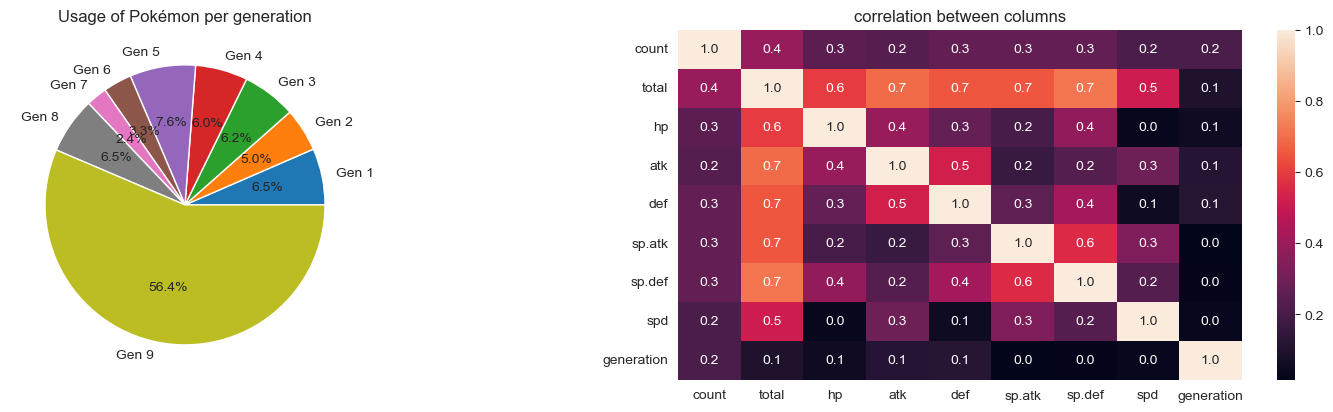

In [36]:
plt.figure(figsize=[20, 10]) # set the size of the figure

# create a pie chart to show the usage of Pokémon per generation, also show the percentage of each generation
plt.subplot(2,2,1) # create a subplot to show the pie chart
plt.pie(gen9_counts, labels=['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7', 'Gen 8','Gen 9'], autopct='%1.1f%%') # create the pie chart
plt.title('Usage of Pokémon per generation') # add a title to the plot

# create a heatmap to show the correlation between the columns
plt.subplot(2,2,2) # create a subplot to show the heatmap
correlations = plot_data.corr() # create the correlation matrix
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f") # create the heatmap
plt.title('correlation between columns') # add a title to the plot

# show the plots
plt.show()

As we can see, there is not really a correlation between the usage of a Pokémon and their generation. This is because the usage of a Pokémon is not dependent on their generation. This is because the usage of a Pokémon is dependent on the meta of the game. This means that the usage of a Pokémon is dependent on the current meta of the game. This is why the usage of a Pokémon is not dependent on their generation. But there is a correlation between the other stats of a Pokémon.

After this I wanted to create a parallel coordinates plot to show the correlation between the different columns in the dataset. This is so that I can see the correlation between the different columns in the dataset since I did not really see anything in the heatmap. For the parallel coordinates plot I wanted to use normalized data. This is so that the plot is easier to read.

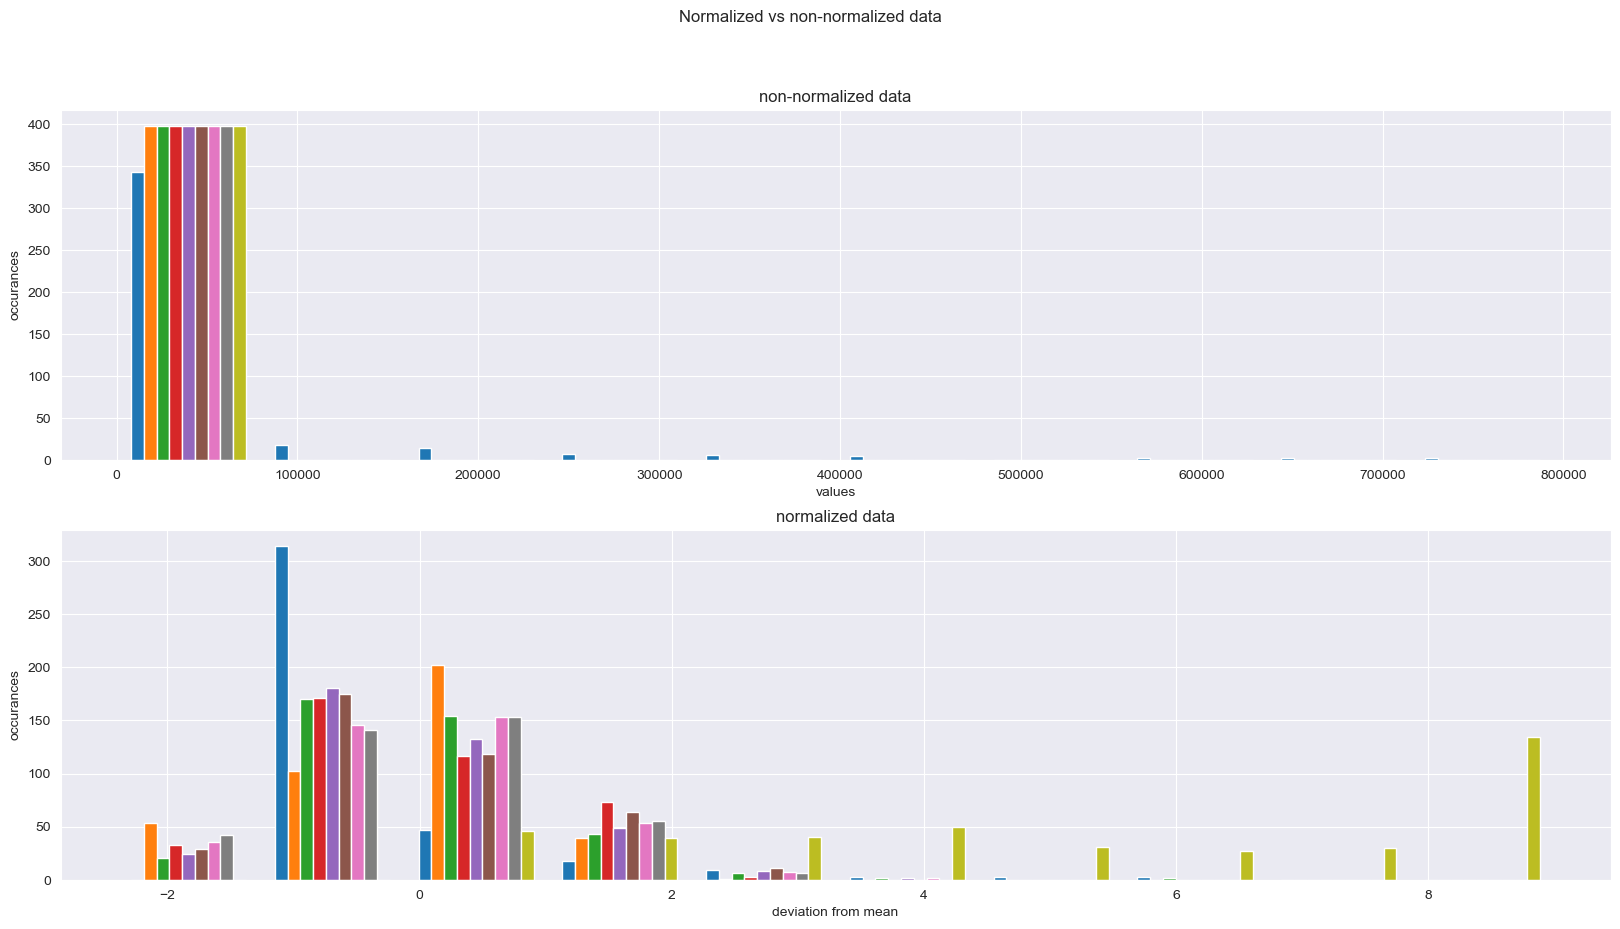

In [37]:
norm_plot_data = plot_data.copy() # create a copy of the plot_data dataframe

# normalize the data
norm_plot_data[['count','total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']] = (norm_plot_data[['count', 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']] - norm_plot_data[['count', 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']].mean()) / norm_plot_data[['count', 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']].std()

plt.figure(figsize=[20, 10])
plt.suptitle('Normalized vs non-normalized data')
labels = ['count','total','type1', 'type2', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd','generation', "monotype"] # create a list with the labels for the legend
plt.legend(labels=labels,
           loc="upper right") # create a legend for the plot
plt.subplots_adjust(right=0.9) # adjust the spacing between the plots

plt.subplot(2,1,1)
plt.title('non-normalized data') # add a title to the plot
plt.xlabel('values') # add a label to the x-axis
plt.ylabel('occurances') # add a label to the y-axis
plt.hist(plot_data) # create the histogram

plt.subplot(2,1,2)
plt.title('normalized data') # add a title to the plot
plt.xlabel('deviation from mean')# add a label to the x-axis
plt.ylabel('occurances') # add a label to the y-axis
plt.hist(norm_plot_data) # create the histogram

plt.show()

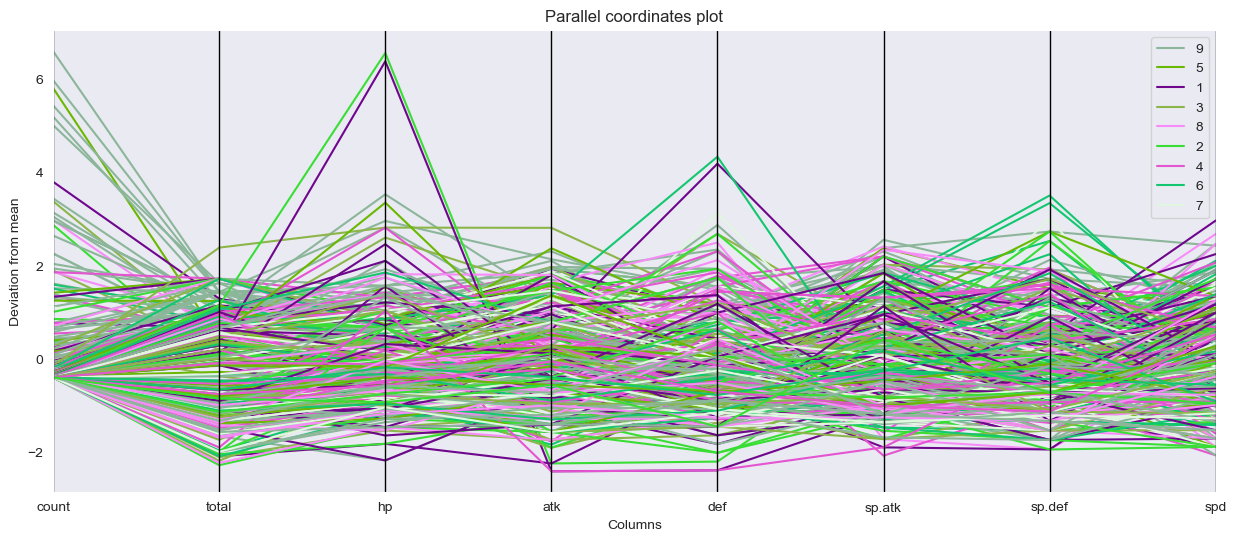

In [38]:
fig = plt.figure(figsize=[15,6]) # set the size of the figure
ax = parallel_coordinates(norm_plot_data,'generation') # create the parallel coordinates plot
ax.set_ylabel('Deviation from mean') # add a label to the y-axis
ax.set_xlabel('Columns') # add a label to the x-axis
ax.set_title('Parallel coordinates plot') # add a title to the plot
plt.show() # show the plot

This still did not really show a clear correlation between the different columns. This is because the data is not normalized. This is why I wanted to create a pair plot to maybe find a correlation between the different columns.

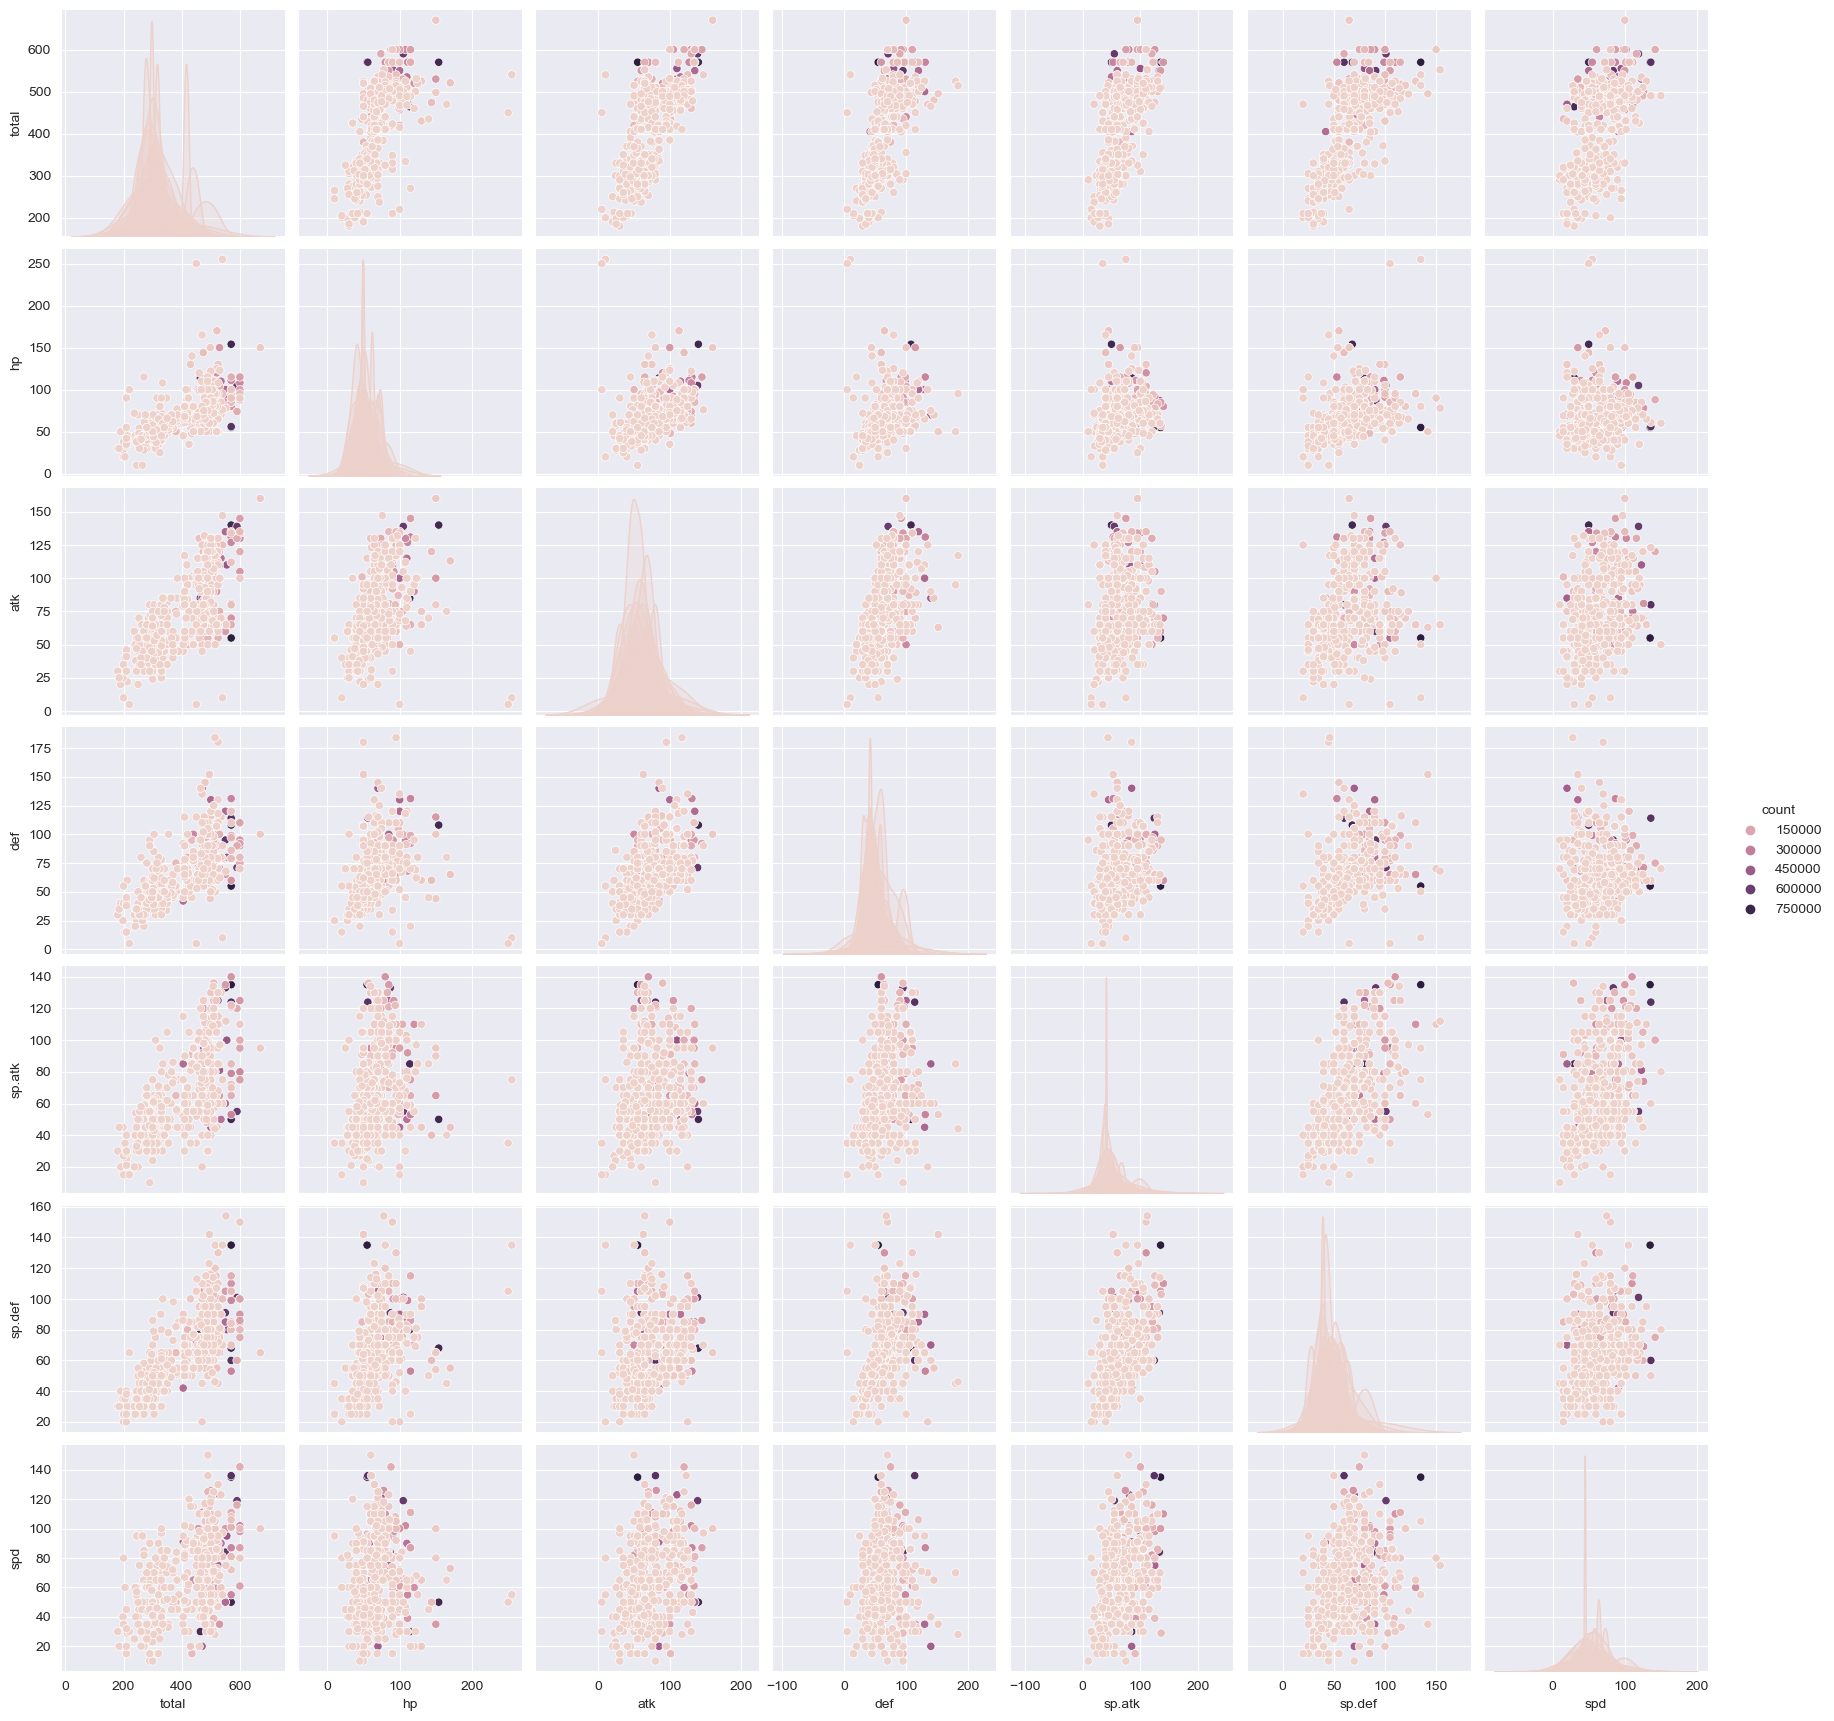

In [40]:
pairplot_data = plot_data[['count','total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']].copy() # create a copy of the plot_data dataframe

sns.pairplot(pairplot_data, hue='count') # create the pairplot with the count column as hue